<h2>Data Integration</h2>

<h3>Imports<h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
import seaborn as sns
from pathlib import Path
from datetime import date
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import sompy
from sompy.sompy import SOMFactory
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


<p>Reading the document<p>

In [2]:
#Open Excel files with different extensions
filename = 'train.csv'
file_path = Path(filename)
file_extension = file_path.suffix.lower()[1:]

if file_extension == 'xlsx':
    d = pd.read_excel(file_path, engine='openpyxl')
    data = d.copy()
elif file_extension == 'xls':
    d = pd.read_excel(file_path)
    data = d.copy()
elif file_extension == 'csv':
    d = pd.read_csv(file_path, delimiter=";")
    data = d.copy()
else:
    raise Exception("File not supported")


<h2>Data Access, Exploration and Understanding</h2>

Data Head

In [3]:
data.head()

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3
4,5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,...,5,5,5,5,5,3,4,1,3,5


Data Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15589 non-null  int64  
 1   Churn              15589 non-null  object 
 2   Name               15589 non-null  object 
 3   Longevity          15589 non-null  object 
 4   Year_Birth         15394 non-null  float64
 5   TypeTravel         15589 non-null  object 
 6   RoomType           15589 non-null  object 
 7   RewardPoints       15589 non-null  int64  
 8   Comfort            15589 non-null  int64  
 9   ReceptionSchedule  15589 non-null  int64  
 10  FoodDrink          15589 non-null  int64  
 11  Location           15589 non-null  int64  
 12  Wifi               15589 non-null  int64  
 13  Amenities          15589 non-null  int64  
 14  Staff              15589 non-null  int64  
 15  OnlineBooking      15589 non-null  int64  
 16  PriceQuality       155

Data Shape

In [5]:
data.shape

(15589, 22)

<h4>Looking for Null Values<h4>

<p> By summing the null values for each attribute and then dividing them by the total of values of the same attribute, we will obtain the percentage of null values that each column has. A value different from 0 means that the column has 1 or more missing values, which is not desired. </p>

In [6]:
data.isna().sum()/len(data)*100

Cust_ID              0.000000
Churn                0.000000
Name                 0.000000
Longevity            0.000000
Year_Birth           1.250882
TypeTravel           0.000000
RoomType             0.000000
RewardPoints         0.000000
Comfort              0.000000
ReceptionSchedule    0.000000
FoodDrink            0.000000
Location             0.000000
Wifi                 0.000000
Amenities            0.000000
Staff                0.000000
OnlineBooking        0.000000
PriceQuality         0.000000
RoomSpace            0.000000
CheckOut             0.000000
Checkin              0.000000
Cleanliness          0.000000
BarService           0.000000
dtype: float64

<h4>Checking for duplicate values</h4>

In [7]:
data.duplicated().sum()

0

<p> We conclude that there are no duplicates in our dataset. Hence, no measures have to be taken into action. </p>

<h4> Finding outliers in Year_Birth </h4>

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.

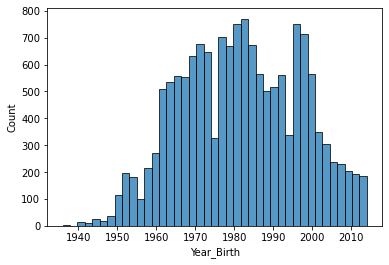

In [8]:
sns.histplot(data=data, x='Year_Birth')

No outliers found.

<h2>Data Preprocessing</h2>

<h4> Power Transformation for Reward Points <h4>

<p>We will now apply a power transformation to make data more Gaussian-like.</p>

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

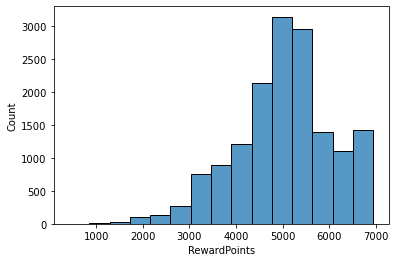

In [9]:
sns.histplot(data=data, x='RewardPoints', bins = 15)

In [10]:
#pt = PowerTransformer(method='yeo-johnson', standardize=True)
#pt.fit(data["RewardPoints"].values.reshape(-1, 1))
#print(pt.lambdas_)
#data['RewardPoints'] = pt.transform(data["RewardPoints"].values.reshape(-1, 1))

In [11]:
#sns.histplot(data=data, x='RewardPoints', bins = 15)

<h4>Using KNN imputer for the missing values in Year_Birth <h4>

In [12]:
# creating an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)

imputer.fit(data['Year_Birth'].values.reshape(-1, 1))
data['Year_Birth'] = imputer.transform(data['Year_Birth'].values.reshape(-1, 1))



In [13]:
data.isna().sum()

Cust_ID              0
Churn                0
Name                 0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
dtype: int64

<p> As demonstrated above, our data frame no longer has missing values. They have been imputed as the means of k-Nearest Neighbor values. </p>

<h4>Transform Year_Birth to age</h4>

We will now transform the variable Year_Birth to age. We will not use this new variable in our models, but it will be useful in order to better undestand the charactheristics of the population we are dealing with.

In [14]:
today = date.today()

age = today.year - data['Year_Birth']
print(age)

0        48.0
1        57.0
2        49.0
3        29.0
4        33.0
         ... 
15584    34.0
15585    22.0
15586    58.0
15587    30.0
15588    39.0
Name: Year_Birth, Length: 15589, dtype: float64


Text(0.5, 0, 'Age')

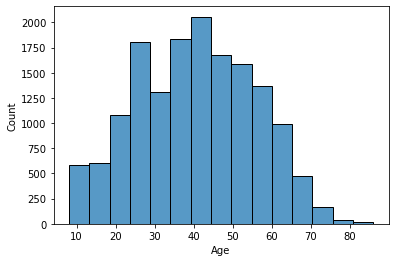

In [15]:
AgePlot = sns.histplot(data=age, x=age, bins = 15)
AgePlot.set_xlabel("Age")

In [16]:
age.mean()

40.293555930882114

We can conclude that the average age of the people in our dataset is around 40 years old. We will now plot the relation between TypeTravel and Year_Birth to check if there are any outliers in that.

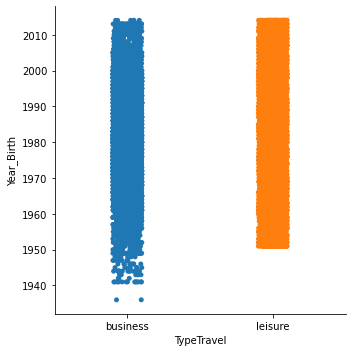

In [17]:
sns.catplot(x="TypeTravel", y = "Year_Birth" , data=data)

It appears that there are two isolated dots from very old people who are still going on business trips. We will consider these outliers and therefore remove them.

In [18]:
data.drop(data[(data['Year_Birth'] < 1937) & (data['TypeTravel'] == "business")].index, inplace = True)

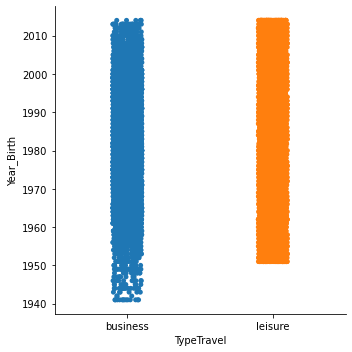

In [19]:
sns.catplot(x="TypeTravel", y = "Year_Birth" , data=data)

<h3>Transform Name in gender </h3>

Since "Name" is not a useful variable for our models, we will transform it to gender. This new variable gives us much better information.

In [20]:
gender = []
for i in data["Name"]:
    if i[:2] == "Mr":
        gender.append(1)
    else:
        gender.append(0)
        i
data["Name"] = gender
data = data.rename(columns = {"Name":"Male"})


<h4>Change Data types</h4>

Replacing the data from longevity to 1 and 0
Yes=1 No=0

In [21]:
data['Longevity'].value_counts()

yes    12546
no      2874
y        167
Name: Longevity, dtype: int64

In [22]:
data['Longevity'].replace(to_replace = 'yes',value = 1, inplace = True)
data['Longevity'].replace(to_replace = 'y',value = 1, inplace = True)
data['Longevity'].replace(to_replace = 'no',value = 0, inplace = True)
data['Longevity'].value_counts()

1    12713
0     2874
Name: Longevity, dtype: int64

<h4>Changing the Values of Column "TypeTravel"</h4>

<p>business = 1 leisure = 0 </p>

In [23]:
data['TypeTravel'].value_counts()

business    10754
leisure      4833
Name: TypeTravel, dtype: int64

In [24]:
data['TypeTravel'].replace(to_replace = 'business',value = 1, inplace = True)
data['TypeTravel'].replace(to_replace = 'leisure',value = 0, inplace = True)
data['TypeTravel'].value_counts()

1    10754
0     4833
Name: TypeTravel, dtype: int64

<h4>Changing the Values of Column "Wifi"</h4>

<p>6 were Replaced by 5 </p>

<AxesSubplot:xlabel='Wifi'>

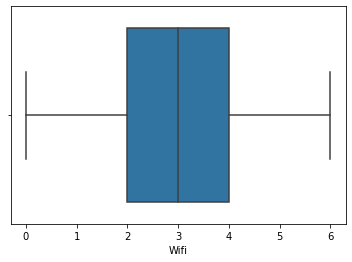

In [25]:
sns.boxplot(x="Wifi", data = data[['Wifi']])

Since the data range goes from 0 to 5, it doesn't make sense to have Wifi evaluated as a 6.

In [26]:
data['Wifi'].value_counts()

4    3704
5    3446
3    3346
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

In [27]:
data['Wifi'].replace(to_replace = 6,value = 5, inplace = True)
data['Wifi'].value_counts()

4    3704
5    3482
3    3346
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

In [28]:
data['Wifi'].max()

5

Now Wifi is evaluated from 0 to 5, like all the other variables.

<h4>Changing the Values of Column "Churn"</h4>

<p>convert "churn" and "nochurn" to 1 (True) and 0 (False) </p>

In [29]:
data['Churn'].value_counts()

nochurn    8477
churn      7110
Name: Churn, dtype: int64

In [30]:
data['Churn'].replace(to_replace = 'churn',value = 1, inplace = True)
data['Churn'].replace(to_replace = 'nochurn',value = 0, inplace = True)
data['Churn'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15587 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15587 non-null  int64  
 1   Churn              15587 non-null  int64  
 2   Male               15587 non-null  int64  
 3   Longevity          15587 non-null  int64  
 4   Year_Birth         15587 non-null  float64
 5   TypeTravel         15587 non-null  int64  
 6   RoomType           15587 non-null  object 
 7   RewardPoints       15587 non-null  int64  
 8   Comfort            15587 non-null  int64  
 9   ReceptionSchedule  15587 non-null  int64  
 10  FoodDrink          15587 non-null  int64  
 11  Location           15587 non-null  int64  
 12  Wifi               15587 non-null  int64  
 13  Amenities          15587 non-null  int64  
 14  Staff              15587 non-null  int64  
 15  OnlineBooking      15587 non-null  int64  
 16  PriceQuality       155

Changing the type of Year_Birth to int32

<p>After applying the power transformation to Year_Birth, some years became non-integer values. Since this does not make sense, we changed the type of this variable to int in order to round those values. </p>

In [31]:
data['Year_Birth']=data['Year_Birth'].astype(int)
data.head(4)

,Cust_ID,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,1,0,1,1974,1,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,0,1,1,1965,1,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,1,1,1,1973,1,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,0,0,1,1993,0,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3


<h4>Room Type change</h4>

In [32]:
data['RoomType'].value_counts()

single    7440
double    7021
suite     1126
Name: RoomType, dtype: int64

<h4>Ordinal Encoding for column RoomType</h4>

In [33]:
data['RoomType'].replace(to_replace = 'suite',value = 2, inplace = True)
data['RoomType'].replace(to_replace = 'double',value = 1, inplace = True)
data['RoomType'].replace(to_replace = 'single',value = 0, inplace = True)
data['RoomType'].value_counts()

0    7440
1    7021
2    1126
Name: RoomType, dtype: int64

<h4>Pearson Correlation Heatmap</h4>

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000028929651A60>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000028929651A60> on colorbar
Setting pcolormesh


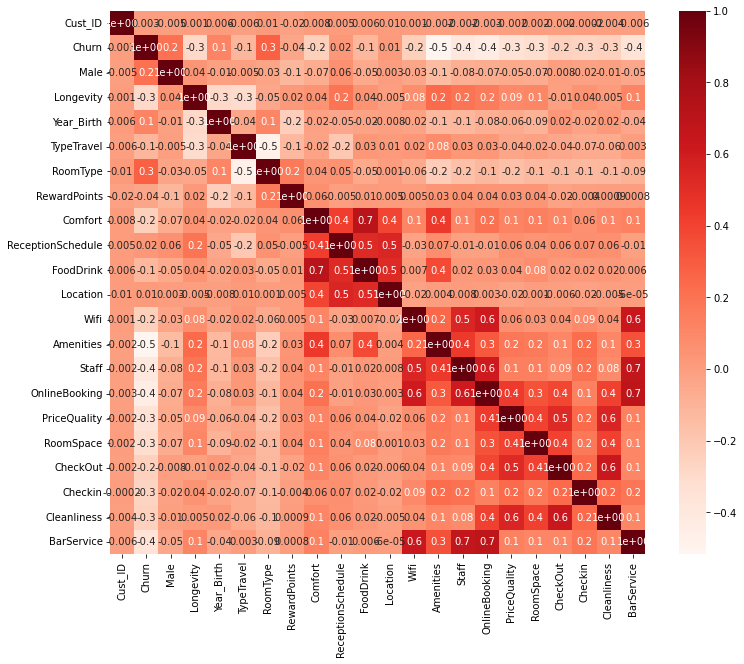

In [34]:
#Pearson correlation
cor_pearson= data.corr(method ='pearson')
#Heatmap function defined
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#print correlation
cor_heatmap(cor_pearson)

<h4>Feature Selection</h4>

<p>With the correlation map we were able see which features had a greater correlation between them. </p>

In [35]:
unscaled_data = data.copy()

In [36]:
data.drop(columns=['Cust_ID'], inplace=True)

<h4>Scaling<h4>

<p>Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a MinMax Normalization.</p>

In [37]:
scaler = RobustScaler().fit(data)
robust_data = scaler.transform(data)

data = pd.DataFrame(robust_data, columns = data.columns)
data.head()

,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1.0,0.0,0.0,-0.291667,0.0,-1.0,-0.150457,0.0,0.5,-1.0,...,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5
1,0.0,1.0,0.0,-0.666667,0.0,-1.0,1.359933,-1.0,-1.0,-1.0,...,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5
2,1.0,1.0,0.0,-0.333333,0.0,-1.0,-0.600998,0.0,0.0,0.0,...,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0
3,0.0,0.0,0.0,0.500000,-1.0,0.0,-1.029925,-1.0,-1.0,-1.0,...,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.333333,0.0,-1.0,0.239401,-0.5,-0.5,0.0,...,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0


<h4>PCA</h4>

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset.

In [38]:
#pca = PCA().fit(data)
#data_PCA = pca.transform(data)

#data = pd.DataFrame(data_PCA, columns = data.columns)
#data.head()

<h4> Perspectives </h4>

In [39]:
data_satisfaction = data[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
data_satisfaction

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5
1,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0
3,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
4,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15582,-0.5,-1.5,-0.5,-0.5,0.0,-1.0,0.0,-0.333333,0.0,0.333333,-1.5,0.0,0.0,0.0
15583,0.0,0.0,0.0,0.0,1.0,-0.5,0.5,0.333333,-1.0,-1.000000,-0.5,1.0,0.0,1.0
15584,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,2.0,0.0,0.5
15585,0.5,0.0,0.5,0.5,1.0,0.0,0.5,0.333333,-2.0,0.333333,0.0,0.0,0.0,1.0


In [40]:
data_customer = data[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].copy()
data_customer

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn
0,0.0,0.0,-0.291667,0.0,-0.150457,-1.0,1.0
1,1.0,0.0,-0.666667,0.0,1.359933,-1.0,0.0
2,1.0,0.0,-0.333333,0.0,-0.600998,-1.0,1.0
3,0.0,0.0,0.500000,-1.0,-1.029925,0.0,0.0
4,1.0,0.0,0.333333,0.0,0.239401,-1.0,0.0
...,...,...,...,...,...,...,...
15582,0.0,-1.0,0.291667,0.0,-0.099751,0.0,1.0
15583,0.0,-1.0,0.791667,0.0,-0.098088,0.0,1.0
15584,1.0,0.0,-0.708333,0.0,-0.866168,-1.0,0.0
15585,1.0,0.0,0.458333,-1.0,0.055694,0.0,0.0


<h3>Modelling</h3>

<h4>K-Means</h4>

<h4> Elbow Method for satisfaction perspective</h4>

In [41]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(data_satisfaction)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

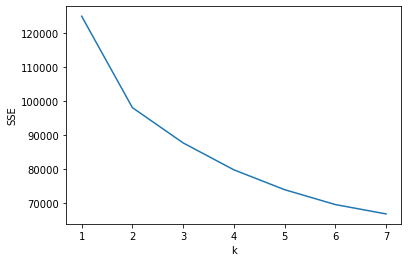

In [42]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)
# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

<h4> Elbow Method for customer perspective</h4>

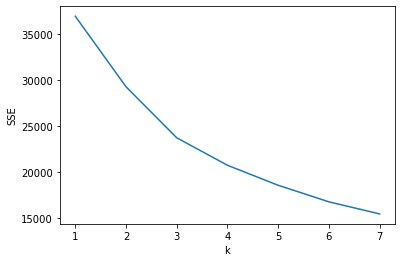

In [43]:
ks = range(1, 8)
inertias = []

for k in ks:
    
    model = KMeans(n_clusters=k)

    
    model.fit(data_customer)

    
    inertias.append(model.inertia_)


plt.plot(ks, inertias)
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

<h4>Dendogram for customer perspective</h4>

In [44]:
#hclustering = linkage(data_customer, 'complete') 
#hclustering = linkage(data_customer, 'average')
#hclustering = linkage(data_customer, 'single')
hclustering = linkage(data_customer, 'ward')

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.

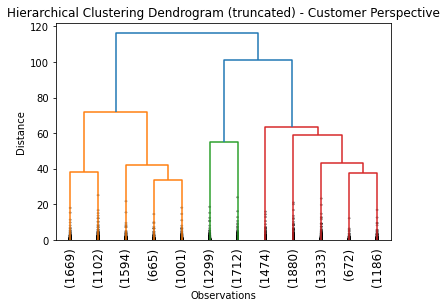

In [45]:
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated) - Customer Perspective')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

<h4>Dendogram for satisfaction perspective</h4>

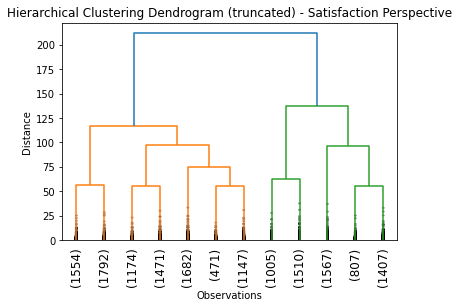

In [46]:
hclustering = linkage(data_satisfaction, 'ward')

plt.title('Hierarchical Clustering Dendrogram (truncated) - Satisfaction Perspective')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

<h4> Applying K-Means </h4>

In [47]:
model_KMeans_satisfaction = KMeans(n_clusters=2)

model_KMeans_satisfaction.fit(data_satisfaction)

KMeans(n_clusters=2)

In [48]:
model_KMeans_customer = KMeans(n_clusters=3)

model_KMeans_customer.fit(data_customer)

KMeans(n_clusters=3)

In [49]:
model_KMeans_satisfaction.cluster_centers_

array([[-0.24066782, -0.11442747, -0.16711293, -0.01307292, -0.04055757,
        -0.58355647, -0.4970074 , -0.4214312 , -1.60954481, -0.37654224,
        -0.51315168, -0.52748464, -0.52331076, -0.06315955],
       [ 0.03177095,  0.07636934, -0.01623728, -0.00276034,  0.23273436,
        -0.12632604, -0.07479974, -0.01731977,  0.19473912, -0.03882514,
         0.1001299 ,  0.9148084 ,  0.10029227,  0.33649058]])

In [50]:
model_KMeans_customer.cluster_centers_

array([[ 0.50652859, -0.14723098,  0.03043862, -0.03264295, -0.93090027,
        -0.94461954,  0.2807294 ],
       [ 0.55829667, -0.31049654,  0.37816232, -0.52985544, -0.08432538,
         0.07448146,  0.71354494],
       [ 0.37628111, -0.05103535, -0.43609252, -0.27525622,  0.80072426,
        -0.54214599,  0.27651119]])

In [51]:
data_satisfaction['label'] = model_KMeans_satisfaction.labels_
data_satisfaction

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label
0,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5,1
1,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5,1
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0,0
3,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1
4,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15582,-0.5,-1.5,-0.5,-0.5,0.0,-1.0,0.0,-0.333333,0.0,0.333333,-1.5,0.0,0.0,0.0,0
15583,0.0,0.0,0.0,0.0,1.0,-0.5,0.5,0.333333,-1.0,-1.000000,-0.5,1.0,0.0,1.0,1
15584,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,2.0,0.0,0.5,1
15585,0.5,0.0,0.5,0.5,1.0,0.0,0.5,0.333333,-2.0,0.333333,0.0,0.0,0.0,1.0,0


In [52]:
data_customer['label'] = model_KMeans_customer.labels_
data_customer

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn,label
0,0.0,0.0,-0.291667,0.0,-0.150457,-1.0,1.0,0
1,1.0,0.0,-0.666667,0.0,1.359933,-1.0,0.0,2
2,1.0,0.0,-0.333333,0.0,-0.600998,-1.0,1.0,0
3,0.0,0.0,0.500000,-1.0,-1.029925,0.0,0.0,1
4,1.0,0.0,0.333333,0.0,0.239401,-1.0,0.0,2
...,...,...,...,...,...,...,...,...
15582,0.0,-1.0,0.291667,0.0,-0.099751,0.0,1.0,1
15583,0.0,-1.0,0.791667,0.0,-0.098088,0.0,1.0,1
15584,1.0,0.0,-0.708333,0.0,-0.866168,-1.0,0.0,0
15585,1.0,0.0,0.458333,-1.0,0.055694,0.0,0.0,1


<h2> Assessment </h2>

In [53]:
descr_satisfaction = data_satisfaction.groupby(['label']).describe().transpose()
descr_satisfaction

label                       0            1
Comfort    count  6350.000000  9237.000000
           mean     -0.240472     0.031666
           std       0.642548     0.706838
           min      -1.500000    -1.500000
           25%      -0.500000    -0.500000
...                       ...          ...
BarService min      -1.500000    -1.000000
           25%      -0.500000     0.000000
           50%       0.000000     0.500000
           75%       0.500000     1.000000
           max       1.000000     1.000000

[112 rows x 2 columns]

In [54]:
descr_customer = data_customer.groupby(['label']).describe().transpose()
descr_customer

label                         0            1            2
Male         count  4436.000000  6361.000000  4790.000000
             mean      0.506312     0.558403     0.376618
             std       0.500017     0.496616     0.484588
             min       0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000
             50%       1.000000     1.000000     0.000000
             75%       1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000
Longevity    count  4436.000000  6361.000000  4790.000000
             mean     -0.146979    -0.310800    -0.051148
             std       0.354125     0.462858     0.220323
             min      -1.000000    -1.000000    -1.000000
             25%       0.000000    -1.000000     0.000000
             50%       0.000000     0.000000     0.000000
             75%       0.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000
Year_Birth   count  4436.000000  6361.000000  4790.000000
             mean      0.030583     0.378740    -0.435899
             std       0.532796     0.587573     0.429188
             min      -1.666667    -1.416667    -1.666667
             25%      -0.375000     0.041667    -0.750000
             50%       0.000000     0.500000    -0.416667
             75%       0.458333     0.791667    -0.125000
             max       1.375000     1.375000     0.958333
TypeTravel   count  4436.000000  6361.000000  4790.000000
             mean     -0.032687    -0.529476    -0.275574
             std       0.177836     0.499170     0.446850
             min      -1.000000    -1.000000    -1.000000
             25%       0.000000    -1.000000    -1.000000
             50%       0.000000    -1.000000     0.000000
             75%       0.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000
RewardPoints count  4436.000000  6361.000000  4790.000000
             mean     -0.932143    -0.084608     0.799528
             std       0.684480     0.453061     0.473313
             min      -3.889443    -2.071488    -0.562760
             25%      -1.406484    -0.339983     0.362427
             50%      -0.843724    -0.030756     0.855777
             75%      -0.372402     0.226933     1.226933
             max       0.257689     1.009144     1.547797
RoomType     count  4436.000000  6361.000000  4790.000000
             mean     -0.944545     0.074045    -0.541754
             std       0.230854     0.454904     0.580743
             min      -1.000000    -1.000000    -1.000000
             25%      -1.000000     0.000000    -1.000000
             50%      -1.000000     0.000000    -1.000000
             75%      -1.000000     0.000000     0.000000
             max       1.000000     1.000000     1.000000
Churn        count  4436.000000  6361.000000  4790.000000
             mean      0.280433     0.714039     0.276409
             std       0.449261     0.451907     0.447268
             min       0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000
             50%       0.000000     1.000000     0.000000
             75%       1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000

<h3>Visualizing the results </h3>

In [55]:
cluster0_satisfaction = data_satisfaction[data_satisfaction.label==0]
cluster1_satisfaction = data_satisfaction[data_satisfaction.label==1]

In [56]:
cluster0_customer = data_customer[data_customer.label==0]
cluster1_customer = data_customer[data_customer.label==1]
cluster2_customer = data_customer[data_customer.label==2]

c:\Users\manue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


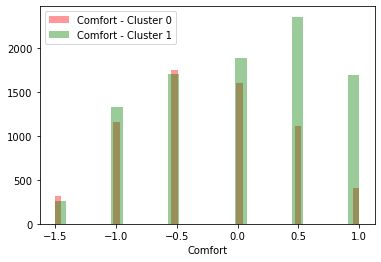

In [57]:
sns.distplot(cluster0_satisfaction['Comfort'],color='red',label='Comfort - Cluster 0', kde = False)
sns.distplot(cluster1_satisfaction['Comfort'],color='green',label='Comfort - Cluster 1', kde = False)
plt.legend()

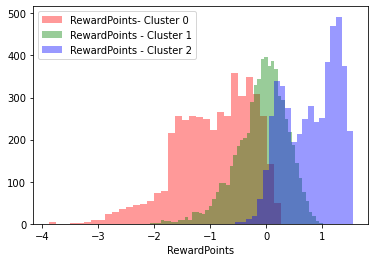

In [58]:
sns.distplot(cluster0_customer['RewardPoints'],color='red',label='RewardPoints- Cluster 0', kde = False)
sns.distplot(cluster1_customer['RewardPoints'],color='green',label='RewardPoints - Cluster 1', kde = False)
sns.distplot(cluster2_customer['RewardPoints'],color='blue',label='RewardPoints - Cluster 2', kde = False)
plt.legend()

<h2>SOM Data Satisfaction</h2>

In [59]:
df_som = np.float32(data_satisfaction.values)

In [60]:
rows = 20
cols = 20
mapsize = [rows, cols]

In [61]:
som = SOMFactory().build(df_som, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [62]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

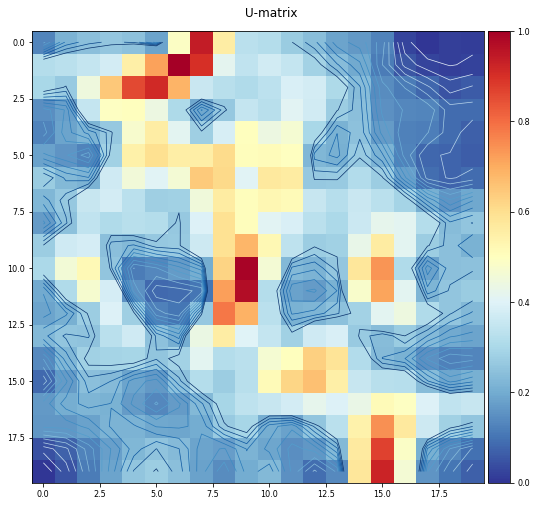

In [63]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

c:\Users\manue\anaconda3\lib\site-packages\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self._fig.add_subplot(no_row_in_plot, no_col_in_plot,


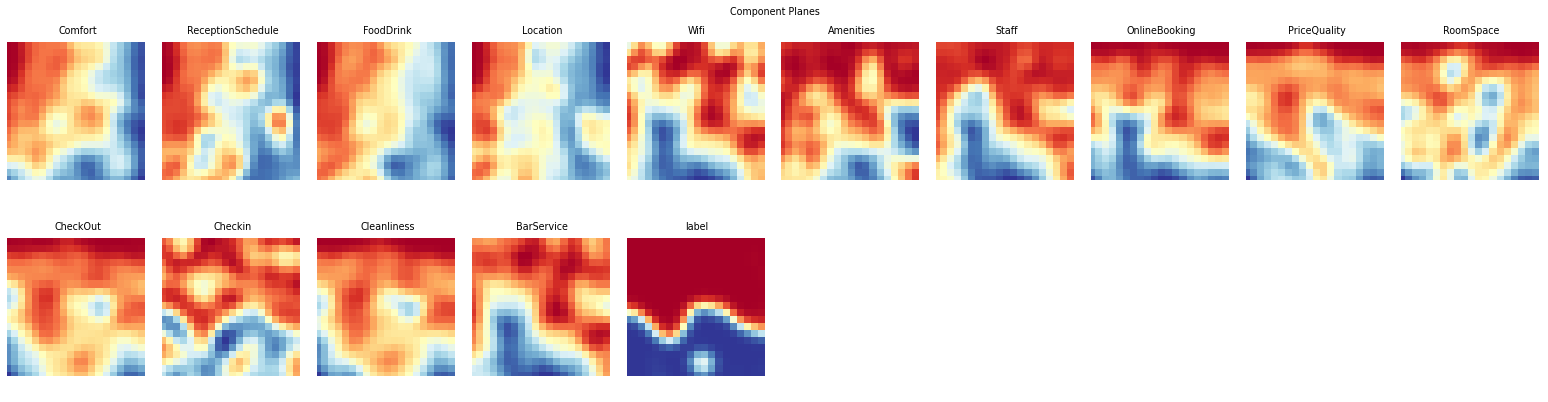

In [64]:
som.component_names = data_satisfaction.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, "Component Planes", text_size=8)  
comp_planes.show(som, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [65]:
bmus = som.project_data(df_som)
bmus

array([215,  58, 364, ..., 139, 211, 288])

In [66]:
cl = som.cluster(n_clusters=2)

In [67]:
labels = getattr(som, 'cluster_labels')
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

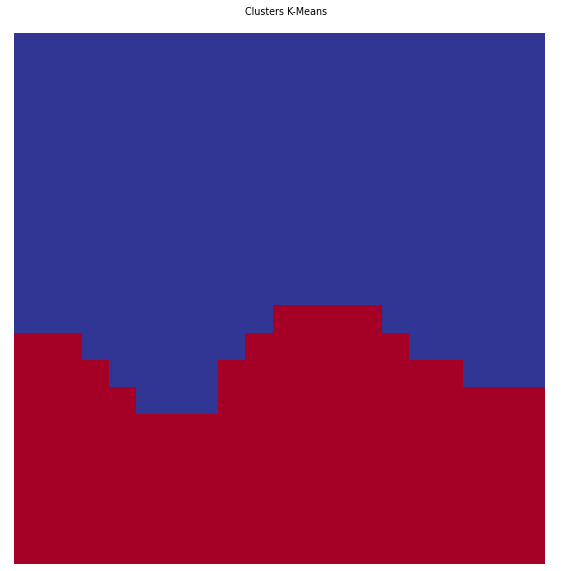

In [68]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som, what='cluster')

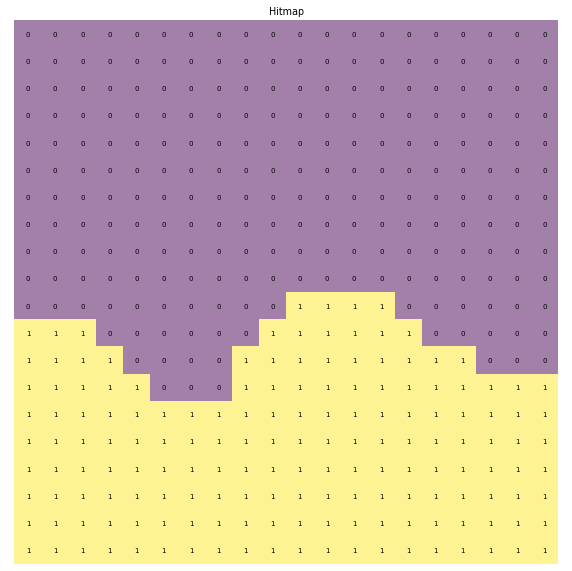

In [69]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [70]:
bmus = som.project_data(df_som)
data_satisfaction['bmu'] = bmus

In [71]:
data_satisfaction['label'] = labels[data_satisfaction['bmu']]
data_satisfaction.head(10)

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label,bmu
0,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5,0,215
1,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5,0,58
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0,1,364
3,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0,119
4,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0,0,76
5,-0.5,-0.5,1.0,1.0,0.0,-1.0,-1.0,-0.666667,-2.0,-0.666667,-1.0,1.0,-1.0,-1.0,1,342
6,-0.5,-0.5,-0.5,0.0,-0.5,-1.0,-1.0,-0.666667,-3.0,-1.000000,-1.0,-1.0,-0.5,-0.5,1,395
7,-0.5,0.0,0.0,0.0,-0.5,0.0,0.0,-0.666667,-2.0,-0.333333,-1.0,-2.0,-1.0,-0.5,1,383
8,-0.5,0.0,0.0,0.0,-0.5,-1.0,-1.0,-0.666667,-2.0,-1.000000,-1.0,-1.0,-1.0,-1.0,1,383
9,0.0,1.0,1.0,1.0,0.0,-0.5,-0.5,-0.333333,0.0,-0.333333,0.0,-2.0,0.0,0.0,1,242


In [72]:
df_final = data.copy(deep=True)
df_final['label'] = data_satisfaction['label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].describe().T
descr

label                       0            1
Comfort    count  9164.000000  6423.000000
           mean      0.044304    -0.255410
           std       0.701996     0.643554
           min      -1.500000    -1.500000
           25%      -0.500000    -0.500000
...                       ...          ...
BarService min      -1.000000    -1.500000
           25%       0.000000    -0.500000
           50%       0.500000     0.000000
           75%       1.000000     0.500000
           max       1.000000     1.000000

[112 rows x 2 columns]

<h2>SOM Data customer</h2>

In [73]:
df_som_customer = np.float32(data_customer.values)

In [74]:
rows = 20
cols = 20
mapsize = [rows, cols]

In [75]:
som = SOMFactory().build(df_som_customer, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [76]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

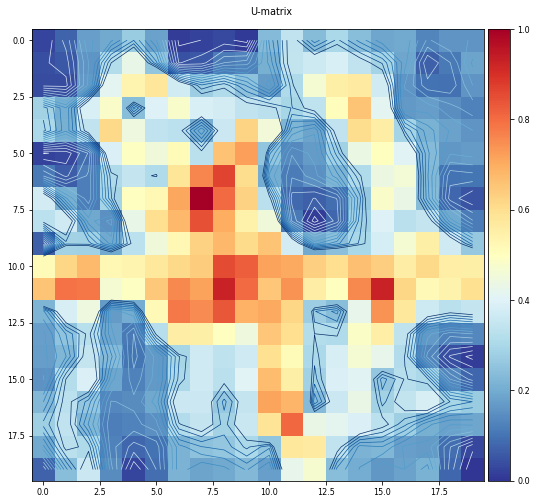

In [77]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

c:\Users\manue\anaconda3\lib\site-packages\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self._fig.add_subplot(no_row_in_plot, no_col_in_plot,


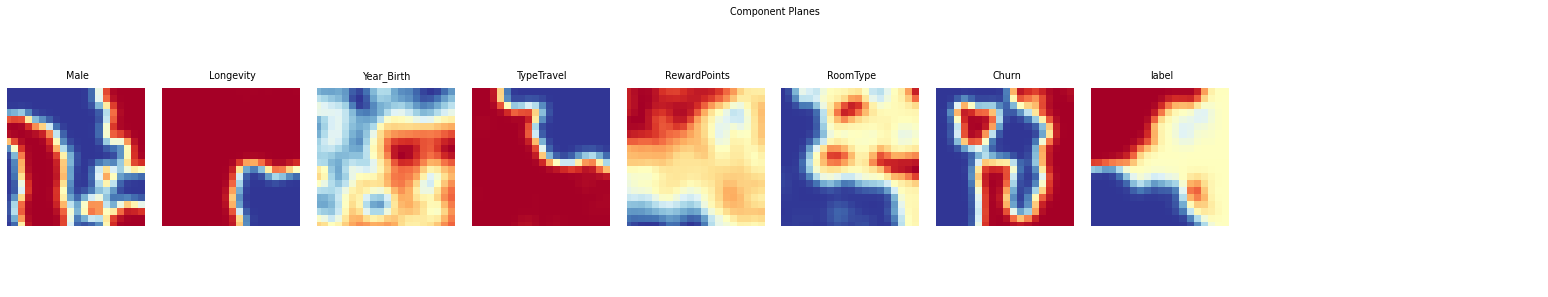

In [78]:
som.component_names = data_customer.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, "Component Planes", text_size=8)  
comp_planes.show(som, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [79]:
bmus = som.project_data(df_som_customer)
bmus

array([289, 100, 327, ..., 243, 135, 217])

In [80]:
cl = som.cluster(n_clusters=3)

In [81]:
labels = getattr(som, 'cluster_labels')
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1,

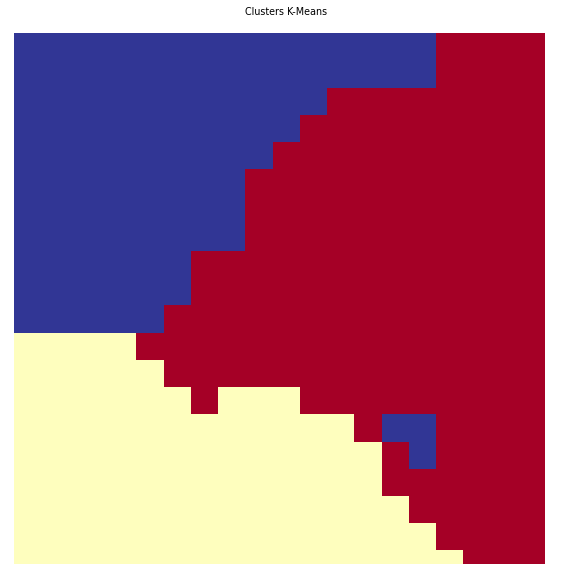

In [82]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som, what='cluster')

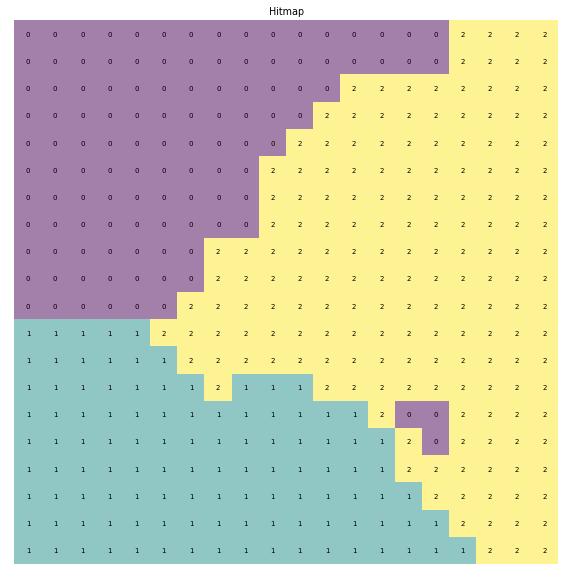

In [83]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [84]:
bmus = som.project_data(df_som_customer)
data_customer['bmu'] = bmus

In [85]:
data_customer['label'] = labels[data_customer['bmu']]
data_customer.head(10)

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn,label,bmu
0,0.0,0.0,-0.291667,0.0,-0.150457,-1.0,1.0,1,289
1,1.0,0.0,-0.666667,0.0,1.359933,-1.0,0.0,0,100
2,1.0,0.0,-0.333333,0.0,-0.600998,-1.0,1.0,1,327
3,0.0,0.0,0.500000,-1.0,-1.029925,0.0,0.0,2,133
4,1.0,0.0,0.333333,0.0,0.239401,-1.0,0.0,0,142
5,0.0,0.0,-0.250000,0.0,0.211139,0.0,1.0,2,229
6,0.0,-1.0,0.375000,0.0,-0.148795,0.0,1.0,2,297
7,1.0,0.0,-0.208333,0.0,-0.873649,-1.0,1.0,1,327
8,1.0,0.0,-0.291667,0.0,-1.158770,-1.0,1.0,1,348
9,1.0,0.0,0.541667,0.0,-1.340815,-1.0,1.0,1,387


In [86]:
df_final = data.copy(deep=True)
df_final['label'] = data_customer['label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].describe().T
descr

label                         0            1            2
Male         count  4684.000000  4354.000000  6549.000000
             mean      0.369983     0.508039     0.558406
             std       0.482851     0.499993     0.496615
             min       0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000
             50%       0.000000     1.000000     1.000000
             75%       1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000
Longevity    count  4684.000000  4354.000000  6549.000000
             mean     -0.031597    -0.155949    -0.312567
             std       0.174943     0.362848     0.463575
             min      -1.000000    -1.000000    -1.000000
             25%       0.000000     0.000000    -1.000000
             50%       0.000000     0.000000     0.000000
             75%       0.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000
Year_Birth   count  4684.000000  4354.000000  6549.000000
             mean     -0.439172     0.040968     0.356632
             std       0.421690     0.529568     0.601162
             min      -1.666667    -1.666667    -1.666667
             25%      -0.750000    -0.375000     0.000000
             50%      -0.416667     0.041667     0.458333
             75%      -0.125000     0.500000     0.791667
             max       0.958333     1.375000     1.375000
TypeTravel   count  4684.000000  4354.000000  6549.000000
             mean     -0.279889    -0.002756    -0.535960
             std       0.448992     0.052432     0.498743
             min      -1.000000    -1.000000    -1.000000
             25%      -1.000000     0.000000    -1.000000
             50%       0.000000     0.000000    -1.000000
             75%       0.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000
RewardPoints count  4684.000000  4354.000000  6549.000000
             mean      0.808546    -0.901122    -0.107984
             std       0.473634     0.693331     0.494473
             min      -0.562760    -3.889443    -2.712386
             25%       0.367207    -1.373234    -0.369077
             50%       0.871155    -0.808811    -0.039069
             75%       1.231920    -0.341854     0.226101
             max       1.547797     0.609310     1.009144
RoomType     count  4684.000000  4354.000000  6549.000000
             mean     -0.539710    -0.968994     0.066117
             std       0.583716     0.173354     0.455465
             min      -1.000000    -1.000000    -1.000000
             25%      -1.000000    -1.000000     0.000000
             50%      -1.000000    -1.000000     0.000000
             75%       0.000000    -1.000000     0.000000
             max       1.000000     0.000000     1.000000
Churn        count  4684.000000  4354.000000  6549.000000
             mean      0.268787     0.277905     0.708658
             std       0.443376     0.448018     0.454416
             min       0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000
             50%       0.000000     0.000000     1.000000
             75%       1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000

<h2>Exploring the Results </h2>

In [87]:
# add labels from satisfaction perspective
unscaled_data['label_sat'] = list(data_satisfaction['label'])
# add labels from customer value perspective
unscaled_data['label_cust'] = list(data_customer['label'])
unscaled_data.head()

,Cust_ID,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label_sat,label_cust
0,1,1,0,1,1974,1,0,4907,3,4,...,4,3,3,3,3,4,3,4,0,1
1,2,0,1,1,1965,1,0,6724,1,1,...,4,5,5,5,5,1,5,2,0,0
2,3,1,1,1,1973,1,0,4365,3,3,...,4,3,3,2,3,2,3,1,1,1
3,4,0,0,1,1993,0,1,3849,1,1,...,5,4,4,4,4,4,4,3,0,2
4,5,0,1,1,1989,1,0,5376,2,2,...,5,5,5,3,4,1,3,5,0,0


In [88]:
#'Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService'
centroids_satisfaction = [[-0.24042251, -0.11303799, -0.16593095, -0.01213937, -0.04028062,
        -0.58308371, -0.49574334, -0.42204004, -1.61280151, -0.37716118,
        -0.51466183, -0.52546114, -0.52451521, -0.06219455],
       [ 0.03142579,  0.07529208, -0.01714626, -0.00340762,  0.23236694,
        -0.12694721, -0.07594115, -0.01716429,  0.19580268, -0.03861965,
         0.10076807,  0.91248377,  0.10071398,  0.33556902]]

In [89]:
centroid_0_Comfort = centroids_satisfaction[0][0]
centroid_1_Comfort = centroids_satisfaction[1][0]
centroid_0_ReceptionSchedule = centroids_satisfaction[0][1]
centroid_1_ReceptionSchedule = centroids_satisfaction[1][1]
centroid_0_FoodDrink = centroids_satisfaction[0][2]
centroid_1_FoodDrink = centroids_satisfaction[1][2]
centroid_0_Location = centroids_satisfaction[0][3]
centroid_1_Location = centroids_satisfaction[1][3]
centroid_0_Wifi = centroids_satisfaction[0][4]
centroid_1_Wifi = centroids_satisfaction[1][4]
centroid_0_Amenities = centroids_satisfaction[0][5]
centroid_1_Amenities = centroids_satisfaction[1][5]
centroid_0_Staff = centroids_satisfaction[0][6]
centroid_1_Staff = centroids_satisfaction[1][6]
centroid_0_OnlineBooking = centroids_satisfaction[0][7]
centroid_1_OnlineBooking = centroids_satisfaction[1][7]
centroid_0_PriceQuality = centroids_satisfaction[0][8]
centroid_1_PriceQuality = centroids_satisfaction[1][8]
centroid_0_RoomSpace = centroids_satisfaction[0][9]
centroid_1_RoomSpace = centroids_satisfaction[1][9]
centroid_0_CheckOut = centroids_satisfaction[0][10]
centroid_1_CheckOut = centroids_satisfaction[1][10]
centroid_0_Checkin = centroids_satisfaction[0][11]
centroid_1_Checkin = centroids_satisfaction[1][11]
centroid_0_Cleanliness = centroids_satisfaction[0][12]
centroid_1_Cleanliness = centroids_satisfaction[1][12]
centroid_0_BarService = centroids_satisfaction[0][13]
centroid_1_BarService = centroids_satisfaction[1][13]

In [90]:
#'Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn'
centroids_customer = [[ 0.50674916, -0.18428946,  0.02273153, -0.01499813, -0.63340051,
        -0.97131609,  0.29865017],
       [ 0.56404635, -0.2773254 ,  0.33642604, -0.55480739, -0.09163078,
         0.11916693,  0.69761979],
       [ 0.33540212, -0.03103181, -0.46878502, -0.31290406,  1.03567708,
        -0.48978536,  0.2746315 ]]

In [91]:
centroid_0_Male = centroids_customer[0][0]
centroid_1_Male = centroids_customer[1][0]
centroid_2_Male = centroids_customer[2][0]
centroid_0_Longevity = centroids_customer[0][1]
centroid_1_Longevity = centroids_customer[1][1]
centroid_2_Longevity = centroids_customer[2][1]
centroid_0_Year_Birth = centroids_customer[0][2]
centroid_1_Year_Birth = centroids_customer[1][2]
centroid_2_Year_Birth = centroids_customer[2][2]
centroid_0_TypeTravel = centroids_customer[0][3]
centroid_1_TypeTravel = centroids_customer[1][3]
centroid_2_TypeTravel = centroids_customer[2][3]
centroid_0_RewardPoints = centroids_customer[0][4]
centroid_1_RewardPoints = centroids_customer[1][4]
centroid_2_RewardPoints = centroids_customer[2][4]
centroid_0_RoomType = centroids_customer[0][5]
centroid_1_RoomType = centroids_customer[1][5]
centroid_2_RoomType = centroids_customer[2][5]
centroid_0_Churn = centroids_customer[0][6]
centroid_1_Churn = centroids_customer[1][6]
centroid_2_Churn = centroids_customer[2][6]



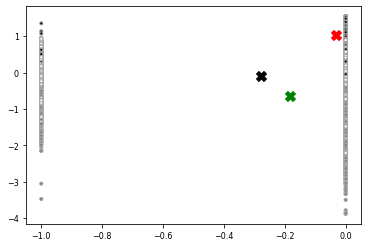

In [92]:
plt.scatter(data['Longevity'], data['RewardPoints'], c=unscaled_data.label_cust, s=10, edgecolors='darkgrey', cmap='bone')
plt.scatter(centroid_0_Longevity, centroid_0_RewardPoints, marker='X', s=100, color='green')
plt.scatter(centroid_1_Longevity, centroid_1_RewardPoints, marker='X', s=100, color='black')
plt.scatter(centroid_2_Longevity, centroid_2_RewardPoints, marker='X', s=100,color='red')
plt.show()

<AxesSubplot:xlabel='count', ylabel='BarService'>

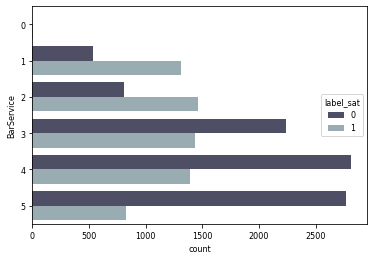

In [93]:
sns.countplot(y = 'BarService', hue = 'label_sat', data = unscaled_data, palette='bone')

<h2>Join Clusters</h2>

In [94]:
#descr = data.reset_index(drop=True)
#descr = descr.groupby(['label_sat', 'label_cust'])[['','','','','']].agg(['count','mean','max','min'])
#descr

In [95]:
unscaled_data['final_label'] = unscaled_data['label_sat'].astype(str) + unscaled_data['label_cust'].astype(str)
unscaled_data.head(30)

,Cust_ID,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label_sat,label_cust,final_label
0,1,1,0,1,1974,1,0,4907,3,4,...,3,3,3,3,4,3,4,0,1,01
1,2,0,1,1,1965,1,0,6724,1,1,...,5,5,5,5,1,5,2,0,0,00
2,3,1,1,1,1973,1,0,4365,3,3,...,3,3,2,3,2,3,1,1,1,11
3,4,0,0,1,1993,0,1,3849,1,1,...,4,4,4,4,4,4,3,0,2,02
4,5,0,1,1,1989,1,0,5376,2,2,...,5,5,3,4,1,3,5,0,0,00
5,6,1,0,1,1975,1,1,5342,2,2,...,2,2,2,2,4,2,1,1,2,12
6,7,1,0,0,1990,1,1,4909,2,2,...,2,1,1,2,2,3,2,1,2,12
7,8,1,1,1,1976,1,0,4037,2,3,...,2,2,3,2,1,2,2,1,1,11
8,9,1,1,1,1974,1,0,3694,2,3,...,2,2,1,2,2,2,1,1,1,11
9,10,1,1,1,1994,1,0,3475,3,5,...,3,4,3,4,1,4,3,1,1,11


In [96]:
cluster00 = unscaled_data[unscaled_data.final_label=='00']
cluster01 = unscaled_data[unscaled_data.final_label=='01']
cluster10 = unscaled_data[unscaled_data.final_label=='10']
cluster11 = unscaled_data[unscaled_data.final_label=='11']
cluster20 = unscaled_data[unscaled_data.final_label=='20']
cluster21 = unscaled_data[unscaled_data.final_label=='21']

c:\Users\manue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


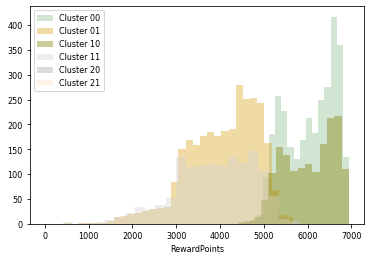

In [97]:
sns.distplot(cluster00['RewardPoints'],color='darkseagreen',label='Cluster 00', kde = False)
sns.distplot(cluster01['RewardPoints'],color='goldenrod',label='Cluster 01', kde = False)
sns.distplot(cluster10['RewardPoints'],color='olive',label='Cluster 10', kde = False)
sns.distplot(cluster11['RewardPoints'],color='lightgrey',label='Cluster 11', kde = False)
sns.distplot(cluster20['RewardPoints'],color='darkgrey',label='Cluster 20', kde = False)
sns.distplot(cluster21['RewardPoints'],color='bisque',label='Cluster 21', kde = False)
plt.legend()

c:\Users\manue\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Users\manue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


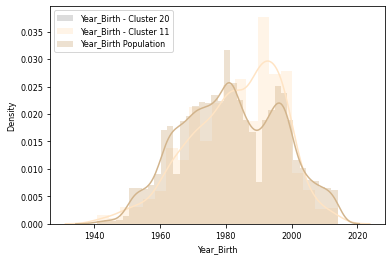

In [98]:
sns.distplot(cluster20['Year_Birth'], color = "darkgrey", label = "Year_Birth - Cluster 20")
sns.distplot(cluster11['Year_Birth'], color = "bisque", label = "Year_Birth - Cluster 11")
sns.distplot(unscaled_data['Year_Birth'], color = "tan", label = "Year_Birth Population")
plt.legend()

<AxesSubplot:xlabel='Year_Birth', ylabel='RewardPoints'>

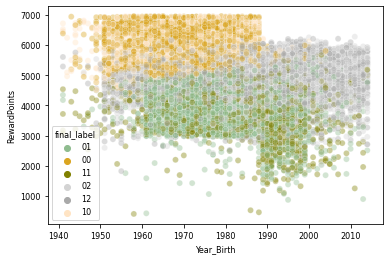

In [99]:
sns.scatterplot(x="Year_Birth", y="RewardPoints", hue="final_label", data=unscaled_data, 
                palette=['darkseagreen','goldenrod','olive','lightgrey','darkgrey','bisque'],
                legend='full', alpha= 0.4)

<h4> Clusters Evaluation for satisfaction perspective</h4>

In [100]:
def silhouette(X, algorithm):
    range_n_clusters = [2, 3, 4, 5, 6]
    silhouette_scores =[]
    
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value
        clusterer = algorithm(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    return silhouette_scores

In [101]:
X = data_satisfaction[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].values

k_means_silhouette = silhouette(X, KMeans)

For n_clusters = 2 The average silhouette_score is : 0.20811730204848586
For n_clusters = 3 The average silhouette_score is : 0.15754809083638524
For n_clusters = 4 The average silhouette_score is : 0.15301976296087152
For n_clusters = 5 The average silhouette_score is : 0.1565419496467772
For n_clusters = 6 The average silhouette_score is : 0.15617298233382476


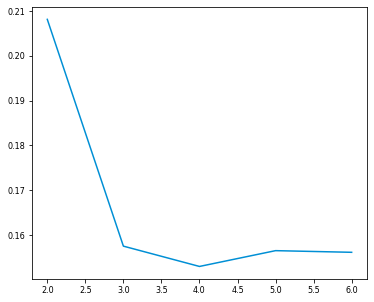

In [102]:
def draw_silhouette(silhouette_scores):
    plt.figure(figsize=(6, 5))
    plt.plot(range(2, 7), silhouette_scores,c="#008fd5",label="Silhouette Coefficient")

draw_silhouette(k_means_silhouette)

In [103]:
hc_silhouette = silhouette(X, AgglomerativeClustering)

For n_clusters = 2 The average silhouette_score is : 0.18312684546971653
For n_clusters = 3 The average silhouette_score is : 0.16518114987466573
For n_clusters = 4 The average silhouette_score is : 0.0968724924306049
For n_clusters = 5 The average silhouette_score is : 0.09599667955993277
For n_clusters = 6 The average silhouette_score is : 0.09618655849499025


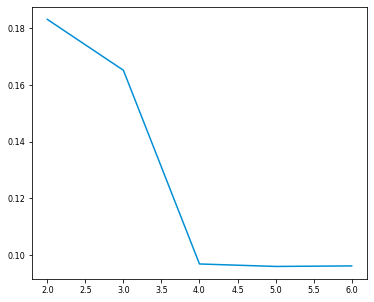

In [104]:
draw_silhouette(hc_silhouette)

<h4>Clusters Evaluation for customer perspective</h4>

In [105]:
X = data_customer[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].values

k_means_silhouette = silhouette(X, KMeans)

For n_clusters = 2 The average silhouette_score is : 0.1937471795343206
For n_clusters = 3 The average silhouette_score is : 0.21812206449574756
For n_clusters = 4 The average silhouette_score is : 0.23730679462355075
For n_clusters = 5 The average silhouette_score is : 0.23510151437574064
For n_clusters = 6 The average silhouette_score is : 0.2526768725983698


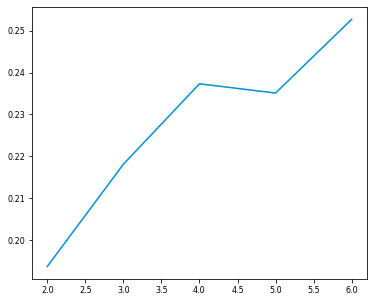

In [106]:
def draw_silhouette(silhouette_scores):
    plt.figure(figsize=(6, 5))
    plt.plot(range(2, 7), silhouette_scores,c="#008fd5",label="Silhouette Coefficient")

draw_silhouette(k_means_silhouette)